### Proximity

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from scipy.optimize import minimize
from scipy.spatial.distance import cdist, pdist
from scipy import stats
from sklearn.neighbors import DistanceMetric
from tslearn.datasets import UCR_UEA_datasets
from sklearn.neighbors import NearestNeighbors
from tslearn.neighbors import KNeighborsTimeSeries
from sklearn.metrics import accuracy_score
from scipy.interpolate import interp1d
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv1D, GlobalAveragePooling1D, BatchNormalization, Conv2D
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.backend import function
from sklearn.neighbors import LocalOutlierFactor
from tslearn.utils import to_sklearn_dataset
from tensorflow import keras
print(tf.__version__)
import seaborn as sns
from scipy.spatial import distance

2.5.0


In [2]:
def ucr_data_loader(dataset):
    
    X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset(dataset)
    
    return X_train, y_train, X_test, y_test


def label_encoder(training_labels, testing_labels):
    
    le = preprocessing.LabelEncoder()
    le.fit(np.concatenate((training_labels, testing_labels), axis=0))
    y_train = le.transform(training_labels)
    y_test = le.transform(testing_labels)
    
    return y_train, y_test

In [3]:
def native_guide_retrieval(query, predicted_label, distance, n_neighbors):

    df = pd.DataFrame(y_train, columns = ['label'])
    df.index.name = 'index'
    df[df['label'] == 1].index.values, df[df['label'] != 1].index.values
    
    ts_length = X_train.shape[1]
    

    knn = KNeighborsTimeSeries(n_neighbors=n_neighbors, metric = distance)
    
    knn.fit(X_train[list(df[df['label'] != predicted_label].index.values)])
    
    dist,ind = knn.kneighbors(query.reshape(1,ts_length), return_distance=True)
    return dist[0], df[df['label'] != predicted_label].index[ind[0][:]]

In [5]:
# for dataset in ['CBF', 'chinatown', 'coffee', 'ecg200', 'gunpoint']:
#
#
#     X_train, y_train, X_test, y_test = ucr_data_loader(str(dataset))
#     y_train, y_test = label_encoder(y_train, y_test)
#
#     min_edit_cf = np.load('../W-CF/' + str(dataset) + '_wachter_cf.npy')
#     cam_swap_cf = np.load('../Native-Guide/' + str(dataset)+'_native_guide_isw.npy')
#
#     model = keras.models.load_model('../fcn_weights/'+str(dataset)+'_best_model.hdf5')
#     y_pred = np.argmax(model.predict(X_test), axis=1)
#
#     nuns = []
#     for instance in range(len(X_test)):
#         nuns.append(native_guide_retrieval(X_test[instance], y_pred[instance], 'euclidean', 1)[1][0])
#     nuns = np.array(nuns)
#
#     l1_nun = []
#     l1_min_edit = []
#     l1_cam_swap = []
#
#     l2_nun = []
#     l2_min_edit = []
#     l2_cam_swap = []
#
#     l_inf_nun = []
#     l_inf_min_edit = []
#     l_inf_cam_swap = []
#
#
#     for instance in range(len(X_test)):
#
#         l1_nun.append(distance.cityblock(X_train[nuns[instance]],X_test[instance]))
#         l1_min_edit.append(distance.cityblock(min_edit_cf[instance],X_test[instance]))
#         l1_cam_swap.append(distance.cityblock(cam_swap_cf[instance],X_test[instance]))
#
#
#         l2_nun.append(np.linalg.norm(X_train[nuns[instance]]-X_test[instance]))
#         l2_min_edit.append(np.linalg.norm(min_edit_cf[instance]-X_test[instance]))
#         l2_cam_swap.append(np.linalg.norm(cam_swap_cf[instance]-X_test[instance]))
#
#
#         l_inf_nun.append(distance.chebyshev(X_train[nuns[instance]],X_test[instance]))
#         l_inf_min_edit.append(distance.chebyshev(min_edit_cf[instance],X_test[instance]))
#         l_inf_cam_swap.append(distance.chebyshev(cam_swap_cf[instance],X_test[instance]))
#
#
#     print({dataset + '_l1' : (np.mean(np.array(l1_min_edit)/np.array(l1_nun)).round(2), np.mean(np.array(l1_cam_swap)/np.array(l1_nun)).round(2))})
#     print({dataset + '_l2' : (np.mean(np.array(l2_min_edit)/np.array(l2_nun)).round(2), np.mean(np.array(l2_cam_swap)/np.array(l2_nun)).round(2))})
#     print({dataset + '_l_inf' : (np.mean(np.array(l_inf_min_edit)/np.array(l_inf_nun)).round(2), np.mean(np.array(l_inf_cam_swap)/np.array(l_inf_nun)).round(2))
#     })

{'CBF_l1': (0.15, 0.34)}
{'CBF_l2': (0.64, 0.59)}
{'CBF_l_inf': (2.07, 0.85)}
{'chinatown_l1': (0.61, 0.31)}
{'chinatown_l2': (0.93, 0.55)}
{'chinatown_l_inf': (1.52, 0.82)}
{'coffee_l1': (0.13, 0.26)}
{'coffee_l2': (0.57, 0.65)}
{'coffee_l_inf': (1.93, 1.0)}
{'ecg200_l1': (0.1, 0.22)}
{'ecg200_l2': (0.45, 0.5)}
{'ecg200_l_inf': (1.26, 0.84)}
{'gunpoint_l1': (0.13, 0.29)}
{'gunpoint_l2': (0.32, 0.58)}
{'gunpoint_l_inf': (0.91, 0.82)}


In [6]:
# for dataset in ['CBF', 'chinatown', 'coffee', 'ecg200', 'gunpoint']:
#
#
#     X_train, y_train, X_test, y_test = ucr_data_loader(str(dataset))
#     y_train, y_test = label_encoder(y_train, y_test)
#
#     min_edit_cf = np.load('../W-CF/' + str(dataset) + '_wachter_cf.npy')
#     cam_swap_cf = np.load('../Native-Guide/' + str(dataset)+'_native_guide_isw_myrun.npy')
#
#     model = keras.models.load_model('../fcn_weights/'+str(dataset)+'_best_model_myrun.hdf5')
#     y_pred = np.argmax(model.predict(X_test), axis=1)
#
#     nuns = []
#     for instance in range(len(X_test)):
#         nuns.append(native_guide_retrieval(X_test[instance], y_pred[instance], 'euclidean', 1)[1][0])
#     nuns = np.array(nuns)
#
#     l1_nun = []
#     l1_min_edit = []
#     l1_cam_swap = []
#
#     l2_nun = []
#     l2_min_edit = []
#     l2_cam_swap = []
#
#     l_inf_nun = []
#     l_inf_min_edit = []
#     l_inf_cam_swap = []
#
#
#     for instance in range(len(X_test)):
#
#         l1_nun.append(distance.cityblock(X_train[nuns[instance]],X_test[instance]))
#         l1_min_edit.append(distance.cityblock(min_edit_cf[instance],X_test[instance]))
#         l1_cam_swap.append(distance.cityblock(cam_swap_cf[instance],X_test[instance]))
#
#
#         l2_nun.append(np.linalg.norm(X_train[nuns[instance]]-X_test[instance]))
#         l2_min_edit.append(np.linalg.norm(min_edit_cf[instance]-X_test[instance]))
#         l2_cam_swap.append(np.linalg.norm(cam_swap_cf[instance]-X_test[instance]))
#
#
#         l_inf_nun.append(distance.chebyshev(X_train[nuns[instance]],X_test[instance]))
#         l_inf_min_edit.append(distance.chebyshev(min_edit_cf[instance],X_test[instance]))
#         l_inf_cam_swap.append(distance.chebyshev(cam_swap_cf[instance],X_test[instance]))
#
#
#     print({dataset + '_l1' : (np.mean(np.array(l1_min_edit)/np.array(l1_nun)).round(2), np.mean(np.array(l1_cam_swap)/np.array(l1_nun)).round(2))})
#     print({dataset + '_l2' : (np.mean(np.array(l2_min_edit)/np.array(l2_nun)).round(2), np.mean(np.array(l2_cam_swap)/np.array(l2_nun)).round(2))})
#     print({dataset + '_l_inf' : (np.mean(np.array(l_inf_min_edit)/np.array(l_inf_nun)).round(2), np.mean(np.array(l_inf_cam_swap)/np.array(l_inf_nun)).round(2))
#     })

{'CBF_l1': (0.15, 0.29)}
{'CBF_l2': (0.64, 0.55)}
{'CBF_l_inf': (2.07, 0.85)}
{'chinatown_l1': (0.61, 0.3)}
{'chinatown_l2': (0.93, 0.55)}
{'chinatown_l_inf': (1.52, 0.82)}
{'coffee_l1': (0.13, 0.23)}
{'coffee_l2': (0.57, 0.62)}
{'coffee_l_inf': (1.93, 1.0)}
{'ecg200_l1': (0.1, 0.21)}
{'ecg200_l2': (0.45, 0.51)}
{'ecg200_l_inf': (1.26, 0.89)}
{'gunpoint_l1': (0.13, 0.31)}
{'gunpoint_l2': (0.32, 0.6)}
{'gunpoint_l_inf': (0.91, 0.82)}


In [5]:
for dataset in ['Lightning2']:


    X_train, y_train, X_test, y_test = ucr_data_loader(str(dataset))
    y_train, y_test = label_encoder(y_train, y_test)

    min_edit_cf = np.load('../W-CF/' + str(dataset) + '_wachter_cf.npy')
    cam_swap_cf = np.load('../Native-Guide/' + str(dataset)+'_native_guide_isw_myrun.npy')

    model = keras.models.load_model('../fcn_weights/'+str(dataset)+'_best_model_myrun.hdf5')
    y_pred = np.argmax(model.predict(X_test), axis=1)

    nuns = []
    for instance in range(len(X_test)):
        nuns.append(native_guide_retrieval(X_test[instance], y_pred[instance], 'euclidean', 1)[1][0])
    nuns = np.array(nuns)

    l1_nun = []
    l1_min_edit = []
    l1_cam_swap = []

    l2_nun = []
    l2_min_edit = []
    l2_cam_swap = []

    l_inf_nun = []
    l_inf_min_edit = []
    l_inf_cam_swap = []


    for instance in range(len(X_test)):

        l1_nun.append(distance.cityblock(X_train[nuns[instance]],X_test[instance]))
        l1_min_edit.append(distance.cityblock(min_edit_cf[instance],X_test[instance]))
        l1_cam_swap.append(distance.cityblock(cam_swap_cf[instance],X_test[instance]))


        l2_nun.append(np.linalg.norm(X_train[nuns[instance]]-X_test[instance]))
        l2_min_edit.append(np.linalg.norm(min_edit_cf[instance]-X_test[instance]))
        l2_cam_swap.append(np.linalg.norm(cam_swap_cf[instance]-X_test[instance]))


        l_inf_nun.append(distance.chebyshev(X_train[nuns[instance]],X_test[instance]))
        l_inf_min_edit.append(distance.chebyshev(min_edit_cf[instance],X_test[instance]))
        l_inf_cam_swap.append(distance.chebyshev(cam_swap_cf[instance],X_test[instance]))


    print({dataset + '_l1' : (np.mean(np.array(l1_min_edit)/np.array(l1_nun)).round(2), np.mean(np.array(l1_cam_swap)/np.array(l1_nun)).round(2))})
    print({dataset + '_l2' : (np.mean(np.array(l2_min_edit)/np.array(l2_nun)).round(2), np.mean(np.array(l2_cam_swap)/np.array(l2_nun)).round(2))})
    print({dataset + '_l_inf' : (np.mean(np.array(l_inf_min_edit)/np.array(l_inf_nun)).round(2), np.mean(np.array(l_inf_cam_swap)/np.array(l_inf_nun)).round(2))
    })

{'Lightning2_l1': (0.07, 0.26)}
{'Lightning2_l2': (0.72, 0.54)}
{'Lightning2_l_inf': (1.59, 0.69)}


### Proximity Analysis and Plotting

Plots for different distances

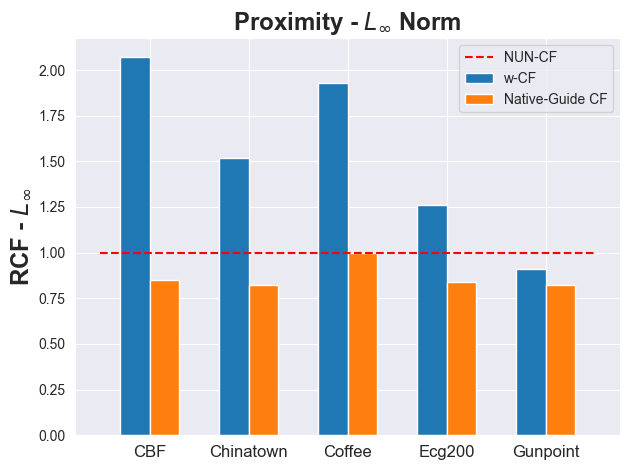

In [6]:
#plt.title(r'W1 disk and central $\pm2^\circ$ subtracted', fontsize='small')


labels = ['CBF', 'Chinatown', 'Coffee', 'Ecg200', 'Gunpoint']

l_inf_w = [2.07,1.52, 1.93, 1.26, 0.91]
l_inf_cam = [0.85,0.82, 1, 0.84, 0.82]



x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, l_inf_w, width, label='w-CF')
rects2 = ax.bar(x + width/2, l_inf_cam, width, label='Native-Guide CF')

ax.hlines(1,xmin=-0.5, xmax=4.5, colors='red', linestyles='--', label='NUN-CF')

ax.set_ylabel('RCF - $L_{\infty}$', size = 'xx-large', fontweight='bold')
ax.set_title('Proximity - $L_{\infty}$ Norm', size='xx-large', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, size='large')
ax.legend()

fig.tight_layout()
#plt.savefig("../Images/L_inf.pdf")
plt.show()

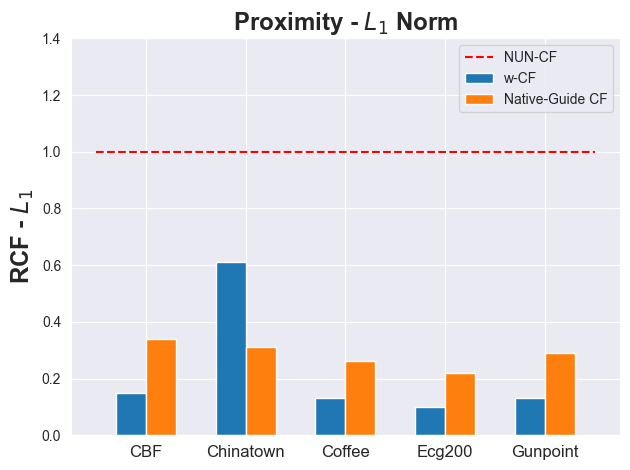

In [7]:
labels = ['CBF', 'Chinatown', 'Coffee', 'Ecg200', 'Gunpoint']

l1_w = [0.15,0.61, 0.13, 0.1, 0.13]
l1_cam = [0.34,0.31, 0.26, 0.22, 0.29]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, l1_w, width, label='w-CF')
rects2 = ax.bar(x + width/2, l1_cam, width, label='Native-Guide CF')

ax.hlines(1,xmin=-0.5, xmax=4.5, colors='red', linestyles='--', label='NUN-CF')

ax.set_ylabel('RCF - $L_{1}$', size = 'xx-large', fontweight='bold')
ax.set_title('Proximity - $L_{1}$ Norm', size='xx-large', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, size='large')
ax.legend()
ax.set_ylim([0,1.4])

fig.tight_layout()
#plt.savefig("../Images/L_1.pdf")
plt.show()

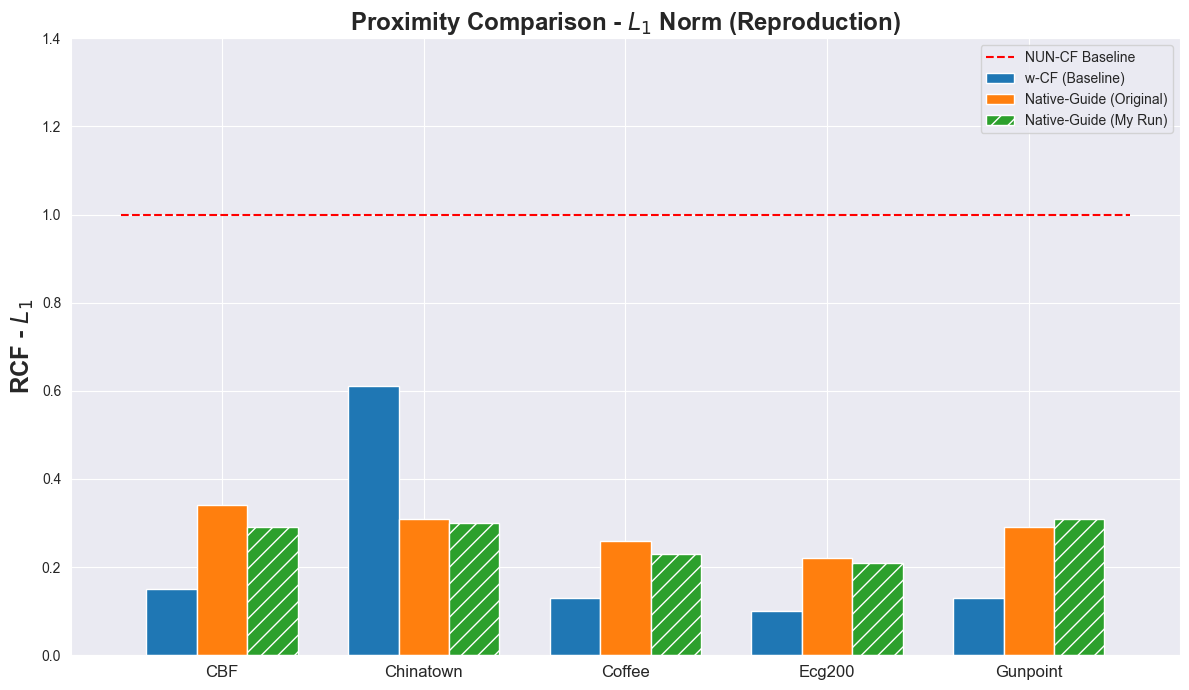

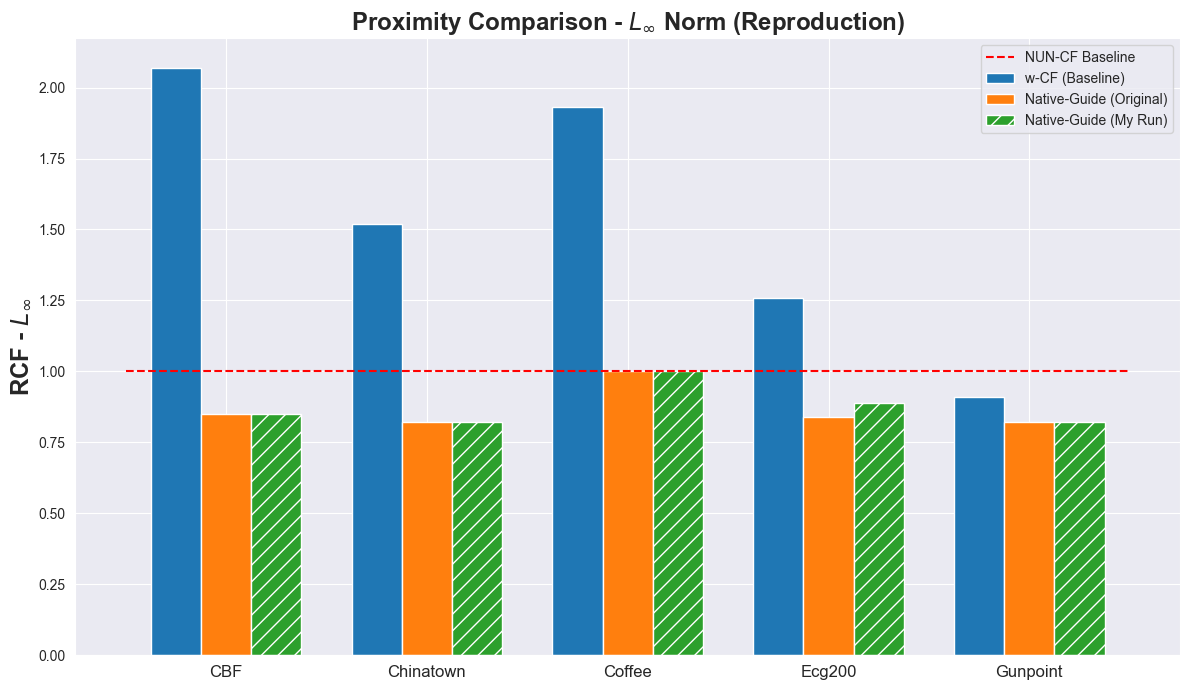

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# --- 准备数据：从您的两次运行结果中复制数据 ---

# x轴标签
labels = ['CBF', 'Chinatown', 'Coffee', 'Ecg200', 'Gunpoint']

# L1 范数的结果
# 原始 w-CF 的结果 (两次运行应该相同)
l1_wcf = [0.15, 0.61, 0.13, 0.1, 0.13]
# 原始 Native-Guide 的结果 (来自 image_1d8fdb.png)
l1_original_ng = [0.34, 0.31, 0.26, 0.22, 0.29]
# 您自己运行的 Native-Guide 的结果 (来自 image_1d8fd5.png)
l1_my_run_ng = [0.29, 0.3, 0.23, 0.21, 0.31]

# L_inf 范数的结果
# 原始 w-CF 的结果
l_inf_wcf = [2.07, 1.52, 1.93, 1.26, 0.91]
# 原始 Native-Guide 的结果
l_inf_original_ng = [0.85, 0.82, 1.0, 0.84, 0.82]
# 您自己运行的 Native-Guide 的结果
l_inf_my_run_ng = [0.85, 0.82, 1.0, 0.89, 0.82]


# --- 绘制 L1 Norm 对比图 ---

x = np.arange(len(labels))  # 标签位置
width = 0.25  # 条形宽度

fig, ax = plt.subplots(figsize=(12, 7))

# 绘制三组条形：w-CF基准，原作者NG结果，您的NG结果
# 通过调整x坐标将它们并排
rects1 = ax.bar(x - width, l1_wcf, width, label='w-CF (Baseline)')
rects2 = ax.bar(x, l1_original_ng, width, label='Native-Guide (Original)')
rects3 = ax.bar(x + width, l1_my_run_ng, width, label='Native-Guide (My Run)', hatch='//') # 用斜线区分您的结果

# 添加基准线和标签
ax.hlines(1, xmin=-0.5, xmax=len(labels)-0.5, colors='red', linestyles='--', label='NUN-CF Baseline')
ax.set_ylabel('RCF - $L_{1}$', size = 'xx-large', fontweight='bold')
ax.set_title('Proximity Comparison - $L_{1}$ Norm (Reproduction)', size='xx-large', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, size='large')
ax.legend()
ax.set_ylim([0, 1.4])

fig.tight_layout()
plt.savefig("My_L1_Comparison.pdf") # 保存为新文件
plt.show()


# --- 绘制 L_inf Norm 对比图 (逻辑完全相同) ---

fig, ax = plt.subplots(figsize=(12, 7))

rects1 = ax.bar(x - width, l_inf_wcf, width, label='w-CF (Baseline)')
rects2 = ax.bar(x, l_inf_original_ng, width, label='Native-Guide (Original)')
rects3 = ax.bar(x + width, l_inf_my_run_ng, width, label='Native-Guide (My Run)', hatch='//')

ax.hlines(1, xmin=-0.5, xmax=len(labels)-0.5, colors='red', linestyles='--', label='NUN-CF Baseline')
ax.set_ylabel('RCF - $L_{\infty}$', size = 'xx-large', fontweight='bold')
ax.set_title('Proximity Comparison - $L_{\infty}$ Norm (Reproduction)', size='xx-large', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, size='large')
ax.legend()

fig.tight_layout()
plt.savefig("My_L_inf_Comparison.pdf") # 保存为新文件
plt.show()

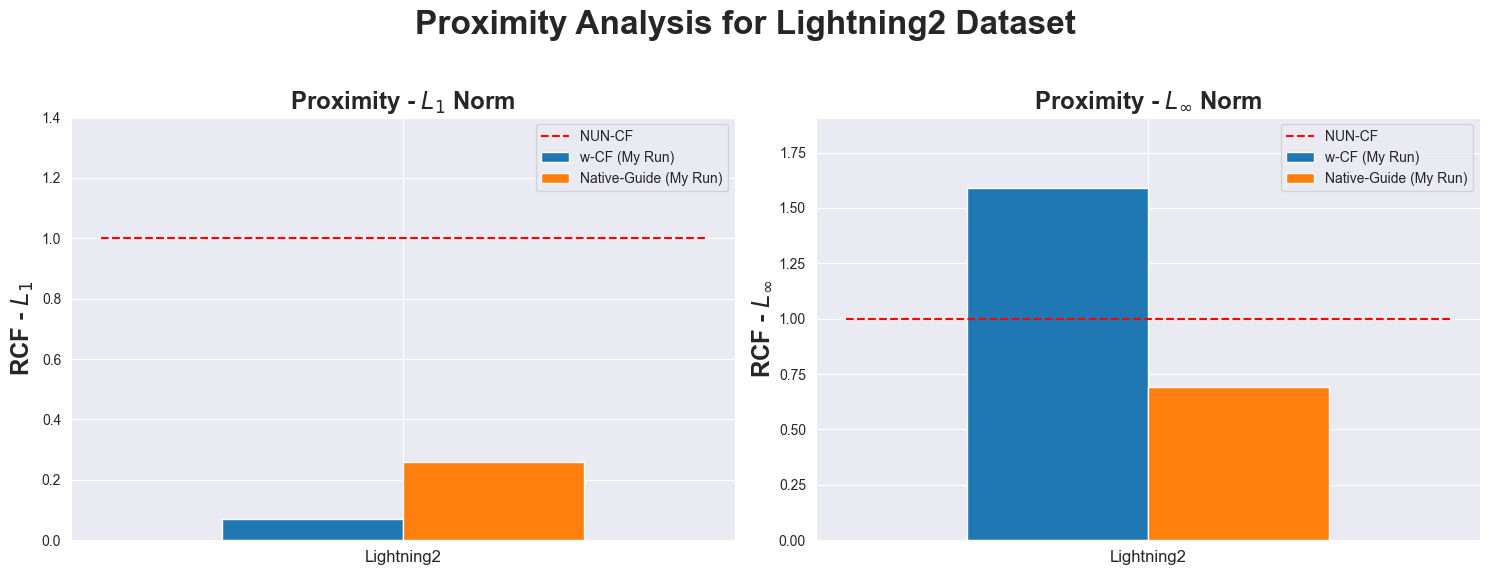

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# --- 第一步：准备数据 ---
# 根据您在图1中提供的运行结果，我们在这里定义数据
# image_f35838.png
labels = ['Lightning2']

# L1 Norm Results for Lightning2: (w-CF, Native-Guide)
l1_wcf = [0.07]
l1_ng = [0.26]

# L_inf Norm Results for Lightning2: (w-CF, Native-Guide)
l_inf_wcf = [1.59]
l_inf_ng = [0.69]


# --- 第二步：创建一张包含两个子图的画布 ---
# plt.subplots(1, 2) 表示创建一个 1行 x 2列 的网格
# fig 是整个图对象，axes 是一个包含两个子图轴的数组 [ax1, ax2]
fig, axes = plt.subplots(1, 2, figsize=(15, 6))


# --- 第三步：在左侧子图 (axes[0]) 上绘制 L1 Norm 图 ---

# 定义条形图的位置和宽度
x = np.arange(len(labels))  # x轴位置，这里是 [0]
width = 0.3  # 条形宽度

# 在左侧子图上绘图
axes[0].bar(x - width/2, l1_wcf, width, label='w-CF (My Run)')
axes[0].bar(x + width/2, l1_ng, width, label='Native-Guide (My Run)')

# 绘制 NUN-CF 基准线
axes[0].hlines(1, xmin=-0.5, xmax=0.5, colors='red', linestyles='--', label='NUN-CF')

# 设置左侧子图的标签和标题
axes[0].set_ylabel('RCF - $L_{1}$', size='xx-large', fontweight='bold')
axes[0].set_title('Proximity - $L_{1}$ Norm', size='xx-large', fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(labels, size='large')
axes[0].legend()
axes[0].set_ylim([0, 1.4]) # 根据L1的值域设定y轴范围


# --- 第四步：在右侧子图 (axes[1]) 上绘制 L_inf Norm 图 ---

# 在右侧子图上绘图
axes[1].bar(x - width/2, l_inf_wcf, width, label='w-CF (My Run)')
axes[1].bar(x + width/2, l_inf_ng, width, label='Native-Guide (My Run)')

# 绘制 NUN-CF 基准线
axes[1].hlines(1, xmin=-0.5, xmax=0.5, colors='red', linestyles='--', label='NUN-CF')

# 设置右侧子图的标签和标题
axes[1].set_ylabel('RCF - $L_{\infty}$', size='xx-large', fontweight='bold')
axes[1].set_title('Proximity - $L_{\infty}$ Norm', size='xx-large', fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(labels, size='large')
axes[1].legend()
axes[1].set_ylim([0, max(l_inf_wcf)*1.2]) # 动态设置y轴，确保能显示所有条柱


# --- 第五步：调整布局并显示/保存图像 ---
fig.suptitle('Proximity Analysis for Lightning2 Dataset', fontsize=24, fontweight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.95]) # 调整布局为总标题留出空间
plt.savefig("Lightning2_Proximity_Comparison.pdf")
plt.show()